In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [436]:
sequence = pd.read_csv("pdb_data_seq.csv")

In [440]:
del sequence

In [438]:
sequence.shape

(467304, 5)

In [381]:
pdb_data = pd.read_csv("pdb_data_no_dups.csv")

In [382]:
pdb_data.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


# Merge on structure ID

In [392]:
del sequence,pdb_data

In [383]:
proteins = sequence.merge(pdb_data, how='inner', on = ['structureId','residueCount','macromoleculeType'])

In [387]:
proteins[proteins['macromoleculeType']=='Protein'].head()

,structureId,chainId,sequence,residueCount,macromoleculeType,classification,experimentalTechnique,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,OXYGEN TRANSPORT,X-RAY DIFFRACTION,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
7,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
8,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,OXYGEN TRANSPORT,X-RAY DIFFRACTION,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
11,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0
12,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,OXYGEN TRANSPORT,X-RAY DIFFRACTION,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0


In [388]:
proteins.shape

(471149, 16)

In [389]:
proteins.to_csv("proteins.csv")

# EDA of dataset

lets take a look at the missing values

In [390]:
proteins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471149 entries, 0 to 471148
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               471149 non-null  object 
 1   chainId                   471139 non-null  object 
 2   sequence                  471121 non-null  object 
 3   residueCount              471149 non-null  int64  
 4   macromoleculeType         435379 non-null  object 
 5   classification            471145 non-null  object 
 6   experimentalTechnique     471149 non-null  object 
 7   resolution                449486 non-null  float64
 8   structureMolecularWeight  471149 non-null  float64
 9   crystallizationMethod     314754 non-null  object 
 10  crystallizationTempK      317697 non-null  float64
 11  densityMatthews           389645 non-null  float64
 12  densityPercentSol         389768 non-null  float64
 13  pdbxDetails               385468 non-null  o

In [2]:
pd.DataFrame((proteins.isna().sum(axis=0) / proteins.shape[0]*100)).sort_values(by =0, ascending=False).plot.bar()
plt.title('Percent Missing values')


NameError: name 'pd' is not defined

I plan on using only the sequence data, so i can use all of them

# How many proteins have been sequenced throughout the years

In [394]:
values = list(proteins['publicationYear'].value_counts())
indices = proteins['publicationYear'].value_counts().index
proteins_in_years = pd.DataFrame(indices,columns=['Year'])
proteins_in_years['Values'] = values
proteins_in_years.sort_values(by='Year',inplace=True,ascending=True)
proteins_in_years


,Year,Values
47,201.0,2
49,1969.0,1
46,1970.0,3
48,1971.0,1
45,1972.0,8
44,1974.0,10
40,1975.0,15
39,1976.0,20
41,1977.0,13
42,1978.0,11


In [395]:
len(proteins_in_years['Year'].unique())
proteins_in_years['Year'].shape

(50,)

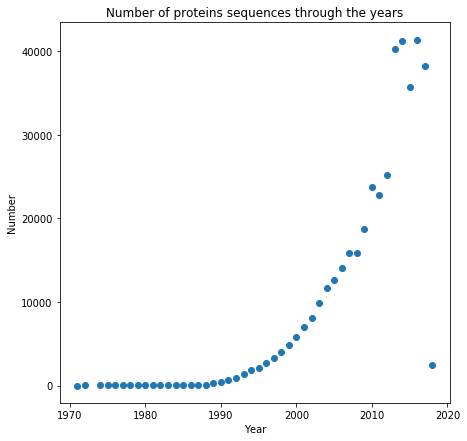

In [396]:
plt.figure(figsize=(7,7))
plt.scatter(proteins_in_years['Year'][proteins_in_years['Year'] > 1970] ,
         proteins_in_years['Values'][proteins_in_years['Year'] > 1970])
plt.title("Number of proteins sequences through the years")
plt.xlabel('Year')
plt.ylabel("Number")
plt.show()

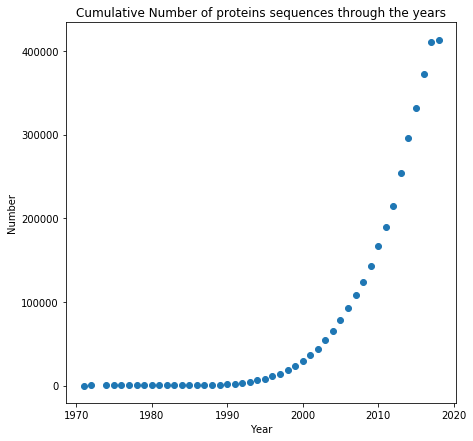

In [397]:
plt.figure(figsize=(7,7))
plt.scatter(proteins_in_years['Year'][proteins_in_years['Year'] > 1970] ,
         np.cumsum(proteins_in_years['Values'][proteins_in_years['Year'] > 1970]))
plt.title("Cumulative Number of proteins sequences through the years")
plt.xlabel('Year')
plt.ylabel("Number")
plt.show()

Let's take a look at the types of molecues

In [398]:
top_15 = list(proteins['classification'].value_counts()[:15].index)
top_15

['RIBOSOME',
 'HYDROLASE',
 'TRANSFERASE',
 'OXIDOREDUCTASE',
 'IMMUNE SYSTEM',
 'LYASE',
 'HYDROLASE/HYDROLASE INHIBITOR',
 'VIRUS',
 'TRANSCRIPTION',
 'VIRAL PROTEIN',
 'TRANSPORT PROTEIN',
 'ISOMERASE',
 'SIGNALING PROTEIN',
 'RIBOSOME/ANTIBIOTIC',
 'LIGASE']

The paper used 10 classes and got fairly accurate classes. I will try using the top 15 classes and see how well of a model I get

In [399]:
proteins[proteins['classification'].isin(top_15)]

,structureId,chainId,sequence,residueCount,macromoleculeType,classification,experimentalTechnique,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
67,117E,A,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,572,Protein,HYDROLASE,X-RAY DIFFRACTION,2.15,65203.21,NaN,NaN,2.71,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",6.0,1998.0
68,117E,B,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,572,Protein,HYDROLASE,X-RAY DIFFRACTION,2.15,65203.21,NaN,NaN,2.71,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",6.0,1998.0
74,11AS,A,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,660,Protein,LIGASE,X-RAY DIFFRACTION,2.50,73530.97,NaN,NaN,2.30,47.00,PROTEIN CRYSTALLIZED FROM 45% SATURATED AMMONI...,7.5,1998.0
75,11AS,B,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,660,Protein,LIGASE,X-RAY DIFFRACTION,2.50,73530.97,NaN,NaN,2.30,47.00,PROTEIN CRYSTALLIZED FROM 45% SATURATED AMMONI...,7.5,1998.0
76,11BA,A,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,248,Protein,HYDROLASE,X-RAY DIFFRACTION,2.06,28700.28,NaN,NaN,2.48,50.36,pH 4.8,4.8,1998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471118,9JDW,A,STQAATASSRNSCAADDKATEPLPKDCPVSSYNEWDPLEEVIVGRA...,386,Protein,TRANSFERASE,X-RAY DIFFRACTION,2.50,44444.61,NaN,NaN,3.83,68.00,pH 7.0,7.0,1999.0
471123,9LPR,A,ANIVGGIEYSINNASLCSVGFSVTRGATKGFVTAGHCGTVNATARI...,203,Protein,HYDROLASE/HYDROLASE INHIBITOR,X-RAY DIFFRACTION,2.20,20455.54,NaN,NaN,2.50,50.88,NaN,NaN,1991.0
471124,9LPR,P,XAAPL,203,Protein,HYDROLASE/HYDROLASE INHIBITOR,X-RAY DIFFRACTION,2.20,20455.54,NaN,NaN,2.50,50.88,NaN,NaN,1991.0
471130,9NSE,A,SRAPAPATPHAPDHSPAPNSPTLTRPPEGPKFPRVKNWELGSITYD...,888,Protein,OXIDOREDUCTASE,X-RAY DIFFRACTION,2.24,102350.65,NaN,NaN,2.41,50.00,pH 6.5,6.5,2000.0


In [400]:
proteins['classification'].value_counts()[:15].sum()

283103

Subset and overwite oringal frame

In [401]:
proteins = proteins[proteins['classification'].isin(top_15)]
#grab only the sequence and classification column
proteins = proteins[['sequence','classification']]
proteins.head()


,sequence,classification
67,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,HYDROLASE
68,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,HYDROLASE
74,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,LIGASE
75,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,LIGASE
76,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,HYDROLASE


Drop nans

In [402]:
proteins.shape

(283103, 2)

In [403]:
proteins = proteins.dropna()

In [404]:
proteins.shape

(283101, 2)

In [405]:
lengths_of_seqs = []
for i in range(0,proteins.shape[0]):
    lengths_of_seqs.append(len(proteins['sequence'].iloc[i]))
proteins['num_residues'] = lengths_of_seqs

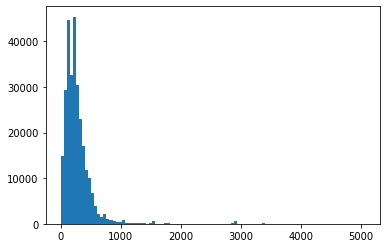

In [406]:
plt.hist(lengths_of_seqs,bins=100)
plt.show()

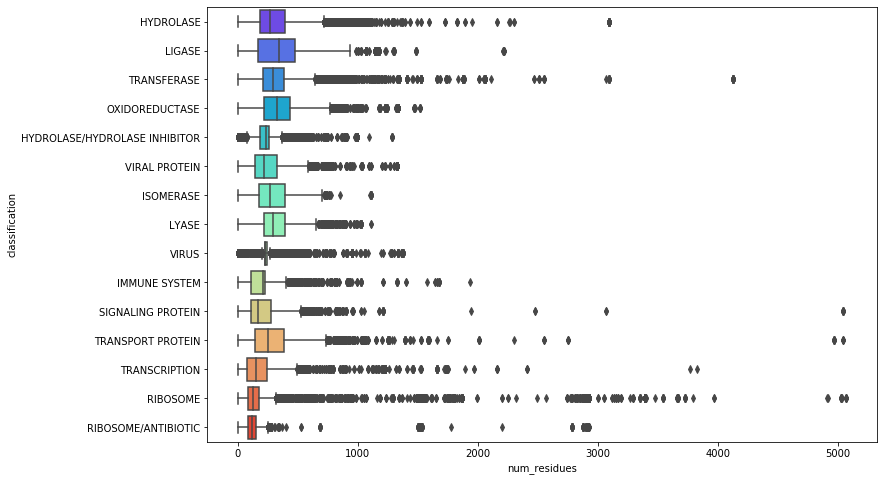

In [407]:
plt.figure(figsize=(12,8))
sns.boxplot(y="classification", x="num_residues",
                 data=proteins, palette="rainbow")

In [408]:
proteins.to_csv("top_15_proteins.csv")

## Transform the labels

In [409]:
from sklearn.preprocessing import LabelBinarizer

# Transform labels to one-hot
lb = LabelBinarizer()
Y = lb.fit_transform(proteins['classification'])

In [410]:
lb.classes_

array(['HYDROLASE', 'HYDROLASE/HYDROLASE INHIBITOR', 'IMMUNE SYSTEM',
       'ISOMERASE', 'LIGASE', 'LYASE', 'OXIDOREDUCTASE', 'RIBOSOME',
       'RIBOSOME/ANTIBIOTIC', 'SIGNALING PROTEIN', 'TRANSCRIPTION',
       'TRANSFERASE', 'TRANSPORT PROTEIN', 'VIRAL PROTEIN', 'VIRUS'],
      dtype='<U29')

In [411]:
Y[46]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [412]:
proteins['classification'].iloc[46]

'VIRAL PROTEIN'

# Note the labels are in order
* in the paper they assign, each amino acid a a number
* look up table is created, and instead of using the letter, they assign it a number
* so there is no LSTM of RNN working here
* lets try this way, first and see if we can make it better with an LSTM

In [413]:
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

# maximum length of sequence, everything afterwards is discarded!
max_length = 512

#create and fit tokenizer
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(proteins['sequence'])
#represent input data as word rank number sequences
X = tokenizer.texts_to_sequences(proteins['sequence'])
X = sequence.pad_sequences(X, maxlen=max_length)

In [414]:
X[67585]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [415]:
tokenizer.word_counts

OrderedDict([('t', 3997949),
             ('y', 2430228),
             ('r', 3976084),
             ('q', 2662360),
             ('i', 3995370),
             ('g', 7199861),
             ('a', 7213068),
             ('k', 4307716),
             ('n', 2940584),
             ('l', 6324699),
             ('e', 4643231),
             ('v', 5162517),
             ('d', 3928680),
             ('p', 3426875),
             ('s', 4366249),
             ('f', 2729909),
             ('h', 1936585),
             ('m', 1674479),
             ('w', 963781),
             ('c', 2235616),
             ('u', 1017508),
             ('x', 284481),
             ('z', 47),
             ('b', 30),
             ('o', 2)])

Across all protein sequences, what are the amino acids that appear most commonly

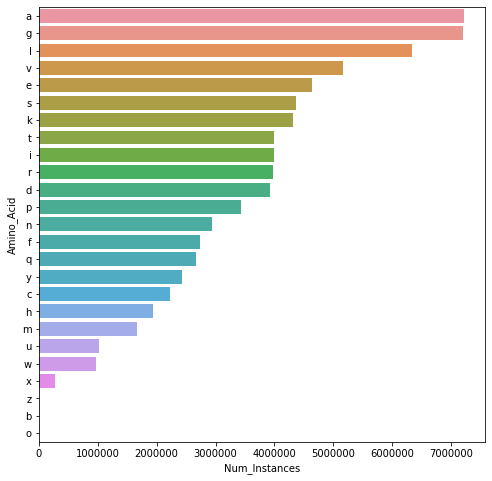

In [416]:
a = pd.DataFrame(tokenizer.word_counts.items(),columns=['Amino_Acid',
                                                        'Num_Instances']).sort_values(by='Num_Instances', ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(data=a, y='Amino_Acid',x ='Num_Instances')

What percent of proteins have at least this kind of amino acid?

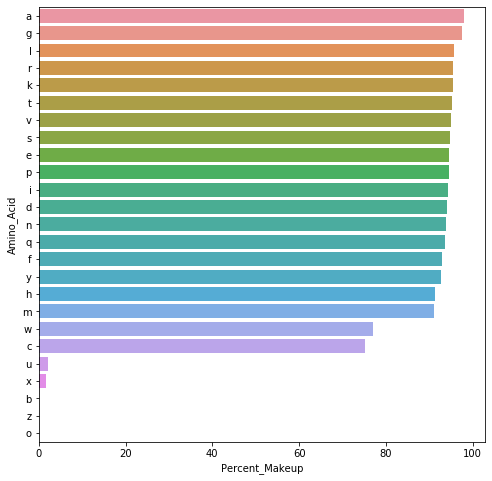

In [417]:
b = pd.DataFrame(tokenizer.word_docs.items(),columns=['Amino_Acid', 'Percent_Makeup'])
b['Percent_Makeup'] = b['Percent_Makeup'].apply(lambda x: (x/proteins.shape[0])*100)
b = b.sort_values(by= ['Percent_Makeup'],ascending = False)
plt.figure(figsize=(8,8))
sns.barplot(data=b, y='Amino_Acid', x='Percent_Makeup')

Amino acids u,x,b,z,o are not that prevalaent in protein sequences

Extra question: is there a difference in amino acid composition amoung the classes of proetins?

In [418]:
proteins.head()

,sequence,classification,num_residues
67,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,HYDROLASE,286
68,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,HYDROLASE,286
74,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,LIGASE,330
75,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,LIGASE,330
76,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,HYDROLASE,124


In [419]:
tokenizer.word_index

{'a': 1,
 'g': 2,
 'l': 3,
 'v': 4,
 'e': 5,
 's': 6,
 'k': 7,
 't': 8,
 'i': 9,
 'r': 10,
 'd': 11,
 'p': 12,
 'n': 13,
 'f': 14,
 'q': 15,
 'y': 16,
 'c': 17,
 'h': 18,
 'm': 19,
 'u': 20,
 'w': 21,
 'x': 22,
 'z': 23,
 'b': 24,
 'o': 25}

In [420]:
a = list(proteins['sequence'].iloc[5].lower())
from collections import Counter


keys  = list(Counter(a).keys()) # equals to list(set(words))
values = list(Counter(a).values())
results = np.zeros(len(tokenizer.word_index))
order_keys = list(tokenizer.word_index.keys())
#traverse order keys, 
for i in range(0,len(order_keys)):
    if order_keys[i] in keys:
        #find index
        idx1 = keys.index(order_keys[i])
        #use index to get count from values
        count = values[idx1]
        #put count in results
        results[i] = count
    else:
        results[i] = 0
    

In [421]:
results

array([ 8.,  6.,  2., 10.,  5., 15., 14.,  9.,  3.,  4.,  4.,  5.,  7.,
        3.,  6.,  4., 10.,  4.,  5.,  0.,  0.,  0.,  0.,  0.,  0.])

Wrap into a function

In [422]:
def count_amino_acids(sequence):
    a = list(sequence.lower())
    keys  = list(Counter(a).keys()) # equals to list(set(words))
    values = list(Counter(a).values())
    results = np.zeros(len(tokenizer.word_index))
    order_keys = list(tokenizer.word_index.keys())
    #traverse order keys, 
    for i in range(0,len(order_keys)):
        if order_keys[i] in keys:
            #find index
            idx1 = keys.index(order_keys[i])
            #use index to get count from values
            count = values[idx1]
            #put count in results
            results[i] = count
        else:
            results[i] = 0
    #normalize results
    results = (results / np.sum(results))*100
    return(results)

    
    

In [423]:
count_amino_acids(proteins['sequence'].iloc[6856])

array([9.96168582, 9.1954023 , 6.1302682 , 9.1954023 , 8.81226054,
       7.66283525, 7.27969349, 4.98084291, 7.66283525, 2.29885057,
       4.21455939, 3.83141762, 5.36398467, 3.0651341 , 1.14942529,
       3.0651341 , 0.        , 1.14942529, 3.83141762, 0.        ,
       1.14942529, 0.        , 0.        , 0.        , 0.        ])

Apply to the whole dataframe

In [424]:
all_reults = []
for i in range(0,proteins.shape[0]):
    #get the sequecne
    seq_to_examine = proteins['sequence'].iloc[i]
    #get the counts
    count_results = count_amino_acids(seq_to_examine)
    all_reults.append(count_results)

In [425]:
count_aa = pd.DataFrame(np.vstack(all_reults),columns=list(tokenizer.word_index.keys()))

In [426]:
proteins = pd.concat([proteins.reset_index(),count_aa],axis=1)

In [442]:
proteins.tail(5)

,index,sequence,classification,num_residues,a,g,l,v,e,s,...,y,c,h,m,u,w,x,z,b,o
283096,471118,STQAATASSRNSCAADDKATEPLPKDCPVSSYNEWDPLEEVIVGRA...,TRANSFERASE,386,7.512953,4.663212,5.440415,5.440415,5.958549,5.181347,...,3.886010,2.072539,2.849741,2.849741,0.0,2.590674,0.0,0.0,0.0,0.0
283097,471123,ANIVGGIEYSINNASLCSVGFSVTRGATKGFVTAGHCGTVNATARI...,HYDROLASE/HYDROLASE INHIBITOR,198,12.121212,16.161616,5.050505,9.595960,2.020202,10.101010,...,2.020202,3.030303,0.505051,1.010101,0.0,1.010101,0.0,0.0,0.0,0.0
283098,471124,XAAPL,HYDROLASE/HYDROLASE INHIBITOR,5,40.000000,0.000000,20.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,20.0,0.0,0.0,0.0
283099,471130,SRAPAPATPHAPDHSPAPNSPTLTRPPEGPKFPRVKNWELGSITYD...,OXIDOREDUCTASE,444,9.009009,6.081081,9.459459,5.855856,5.855856,6.756757,...,2.927928,2.252252,2.927928,1.351351,0.0,2.702703,0.0,0.0,0.0,0.0
283100,471131,SRAPAPATPHAPDHSPAPNSPTLTRPPEGPKFPRVKNWELGSITYD...,OXIDOREDUCTASE,444,9.009009,6.081081,9.459459,5.855856,5.855856,6.756757,...,2.927928,2.252252,2.927928,1.351351,0.0,2.702703,0.0,0.0,0.0,0.0


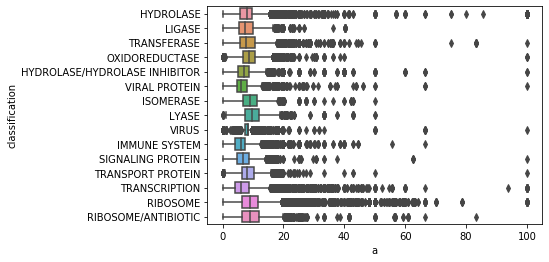

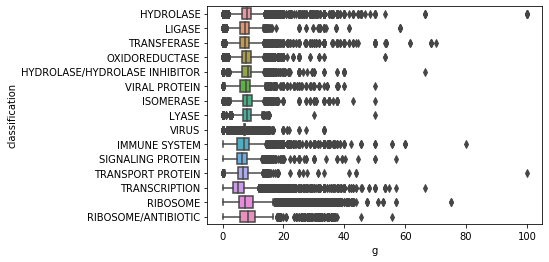

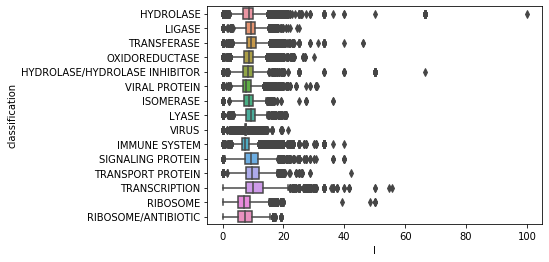

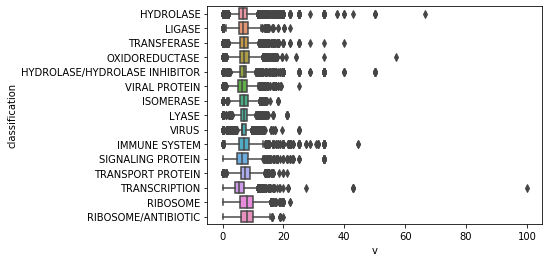

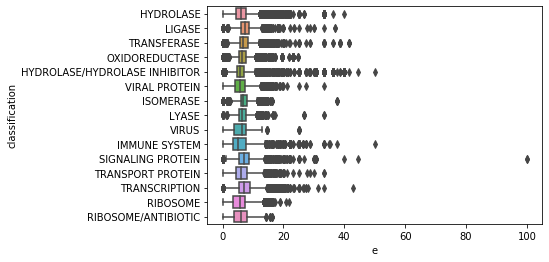

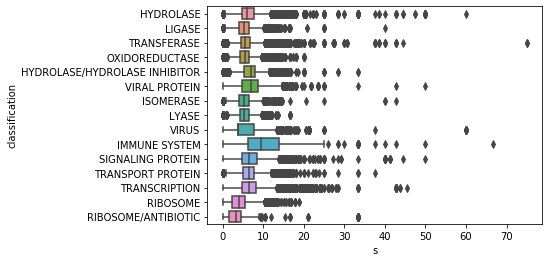

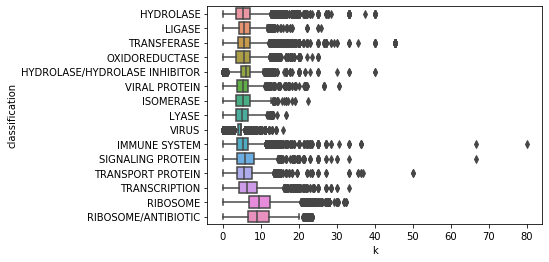

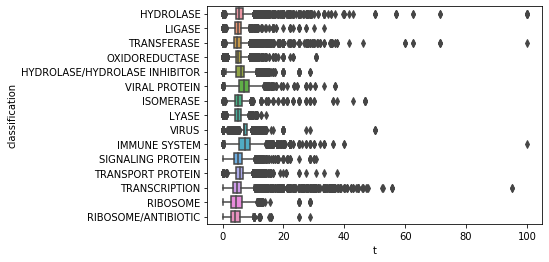

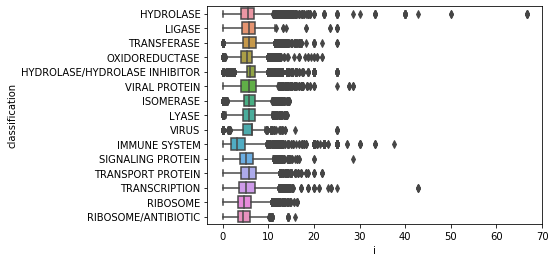

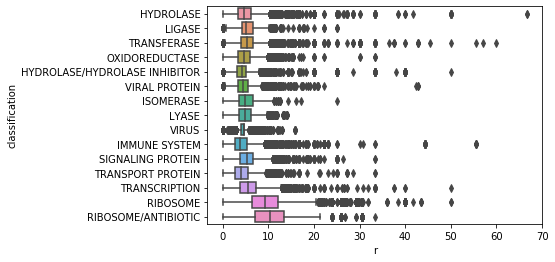

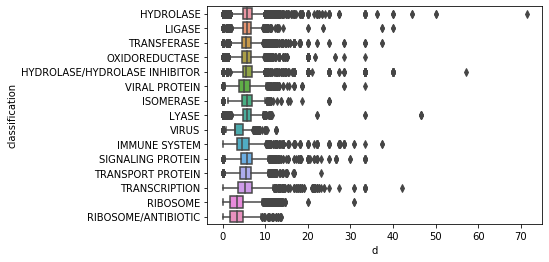

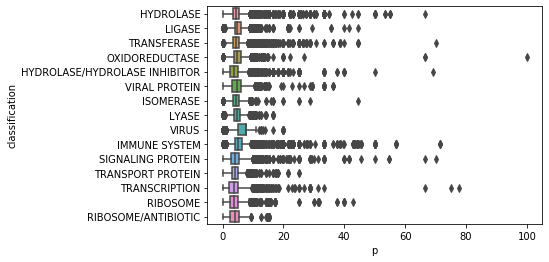

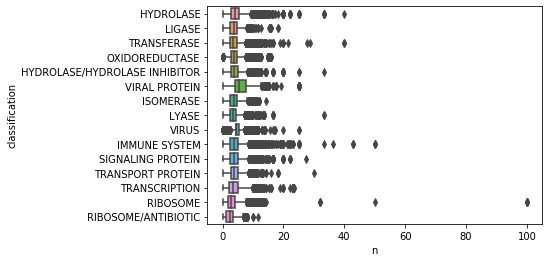

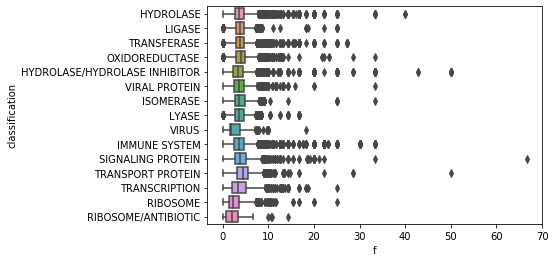

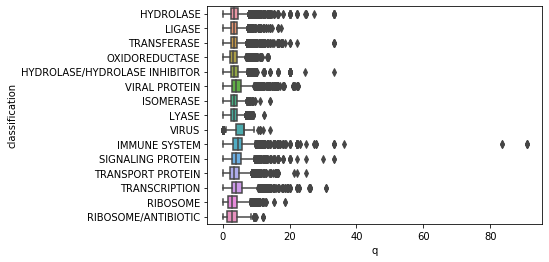

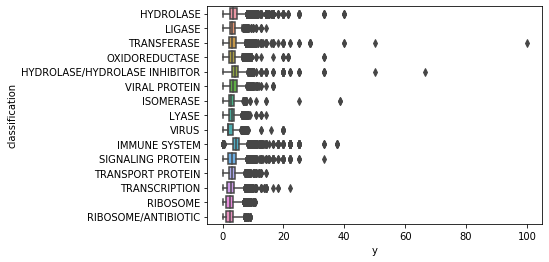

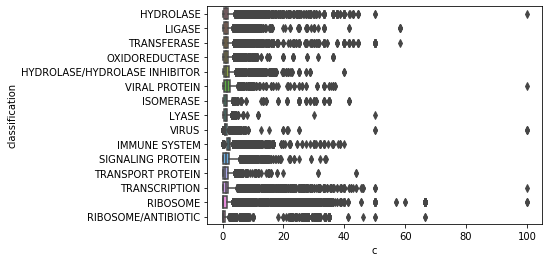

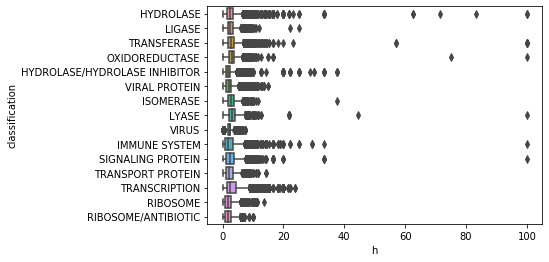

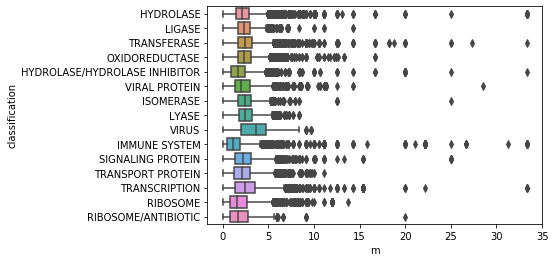

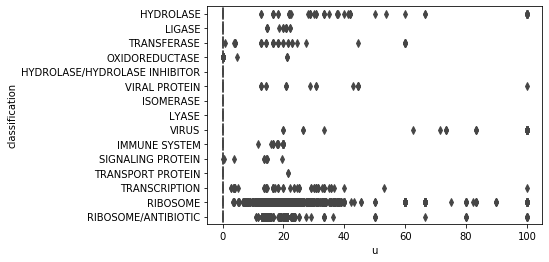

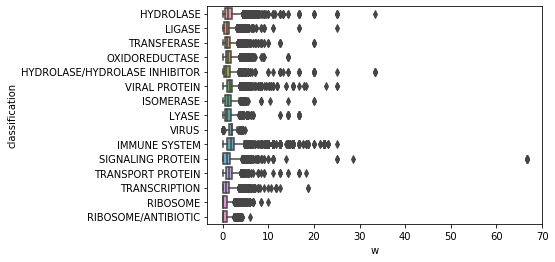

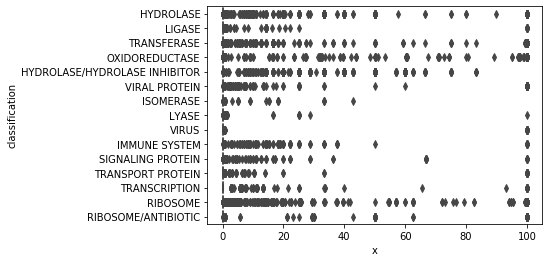

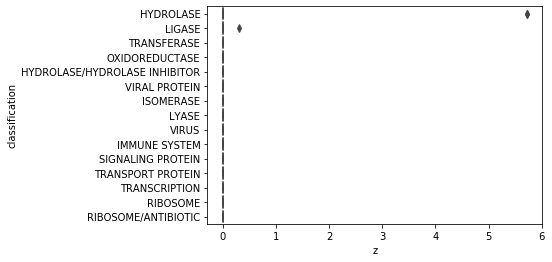

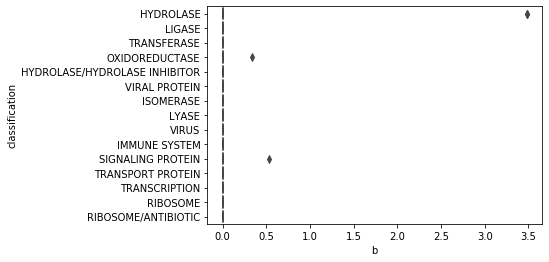

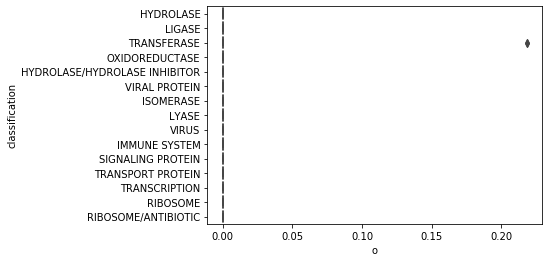

In [435]:
for a in order_keys:
    sns.boxplot(data=proteins,x=a,y='classification')
    plt.show()

Nope no difference! Let's go in to the modeling part

* use an emebedding layer, since there are only 26 amino acids
* could also use a 2d convolution on the one hot representation
* instead of using every n-gram, consider using 1D-convolution on the embedded sequences. The size of the convolutional kernel can be seen as size of n-grams and the number of filters as number of words.
* to improve performance also a deep architecture (subsequent layers of convolution and pooling) can be used, here two layers, where the first layer has 64 filters with convolutional size of 6 and the second layer has 32 filters of size 3.
* Flatten and pass activations into fully connceted layers where the last layer is a softmax activation and size corresponding to the number of classes.

In [447]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding

embedding_dim = 12

# create the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=max_length))
model.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 512, 12)           312       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 512, 64)           4672      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 256, 64)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 256, 32)           6176      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 128, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               524416    
________

In [448]:
X.shape

(283101, 512)

In [449]:
Y.shape

(283101, 15)

Split into train, test, and valid

In [450]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.1)

In [452]:
#keep X_test and y_test until the end get valids
X_test.shape
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.1)

In [457]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=40, batch_size=128)

Train on 229311 samples, validate on 25479 samples
Epoch 1/40
229311/229311 [==============================] - 321s 1ms/step - loss: 0.6651 - acc: 0.8040 - val_loss: 0.5944 - val_acc: 0.8289
Epoch 2/40
229311/229311 [==============================] - 319s 1ms/step - loss: 0.4822 - acc: 0.8577 - val_loss: 0.5074 - val_acc: 0.8573
Epoch 3/40
229311/229311 [==============================] - 332s 1ms/step - loss: 0.3839 - acc: 0.8853 - val_loss: 0.4572 - val_acc: 0.8769
Epoch 4/40
229311/229311 [==============================] - 335s 1ms/step - loss: 0.3239 - acc: 0.9016 - val_loss: 0.4175 - val_acc: 0.8914
Epoch 5/40
229311/229311 [==============================] - 334s 1ms/step - loss: 0.2850 - acc: 0.9129 - val_loss: 0.4003 - val_acc: 0.8982
Epoch 6/40
229311/229311 [==============================] - 335s 1ms/step - loss: 0.2585 - acc: 0.9204 - val_loss: 0.4145 - val_acc: 0.8975
Epoch 7/40
229311/229311 [==============================] - 336s 1ms/step - loss: 0.2408 - acc: 0.9249 - val_

In [460]:
model1_history = pd.DataFrame(model.history.history)

In [461]:
model1_history.to_csv("model1_history.csv")

In [474]:
model.save('protein_seq_model1.h5')

In [475]:
model.save_weights('protein_seq_model1_weights.h5')

## Diagnostic Plots

Plot the losses first

<Figure size 576x576 with 0 Axes>

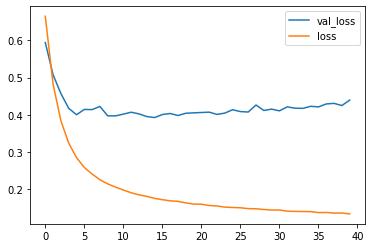

<Figure size 576x576 with 0 Axes>

In [470]:
plt.figure(figsize=(8,8))
model1_history[['val_loss','loss']].plot.line()
plt.figure(figsize=(8,8))
plt.show()


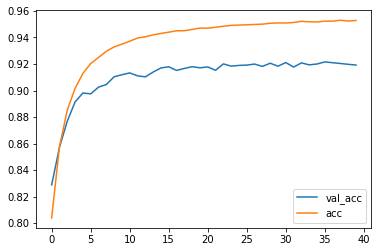

In [472]:
model1_history[['val_acc','acc']].plot.line()

## Get accuracies,f1,blah blah all the she bang

In [473]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("train-acc = " + str(accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))))
print("test-acc = " + str(accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))))

train-acc = 0.9546729114608544
test-acc = 0.9148387552541415


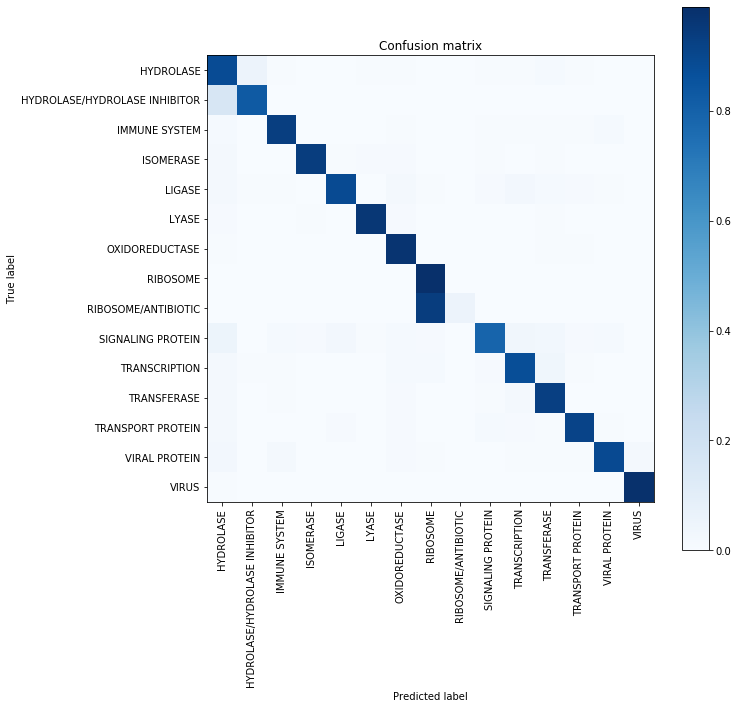

In [476]:
# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
#for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The model is having a hard time trying to tell the difference between Ribosome and Ribsome/Antibiotic

In [478]:
np.diag(cm)

array([0.88, 0.83, 0.93, 0.94, 0.89, 0.96, 0.97, 0.99, 0.06, 0.79, 0.88,
       0.93, 0.91, 0.89, 0.98])

In [479]:
print(classification_report(np.argmax(y_test, axis=1), 
                            np.argmax(test_pred, axis=1), 
                            target_names=lb.classes_))

                               precision    recall  f1-score   support

                    HYDROLASE       0.91      0.88      0.90      4754
HYDROLASE/HYDROLASE INHIBITOR       0.77      0.83      0.80      1160
                IMMUNE SYSTEM       0.95      0.93      0.94      1675
                    ISOMERASE       0.93      0.94      0.93       639
                       LIGASE       0.88      0.89      0.88       469
                        LYASE       0.95      0.96      0.96      1218
               OXIDOREDUCTASE       0.96      0.97      0.96      3500
                     RIBOSOME       0.91      0.99      0.95      5985
          RIBOSOME/ANTIBIOTIC       0.75      0.06      0.11       572
            SIGNALING PROTEIN       0.83      0.79      0.81       645
                TRANSCRIPTION       0.85      0.88      0.86      1090
                  TRANSFERASE       0.95      0.93      0.94      3805
            TRANSPORT PROTEIN       0.89      0.91      0.90       858
     

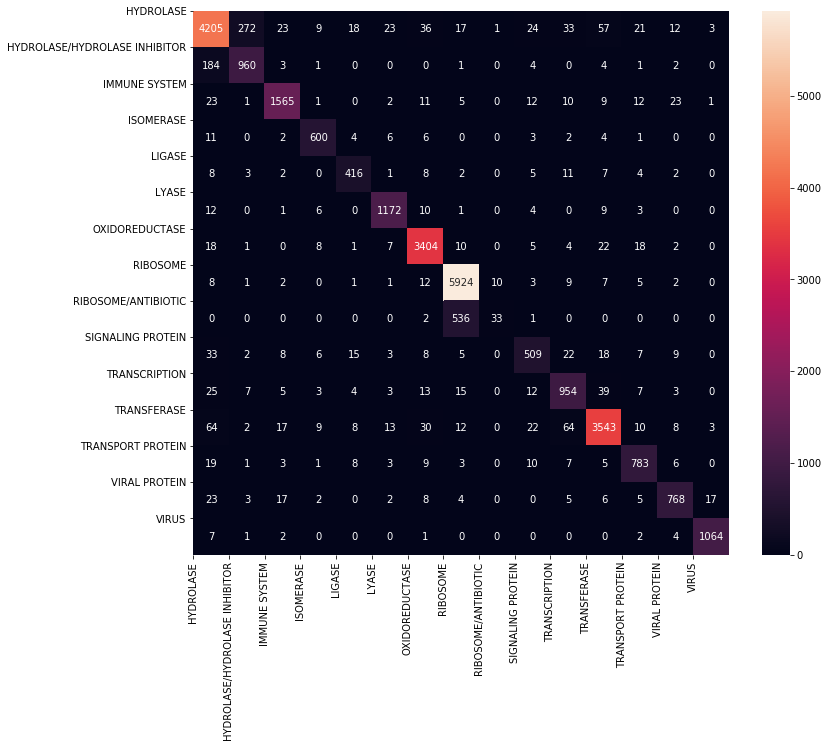

In [491]:
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), 
                             np.argmax(test_pred, axis=1)), annot=True, fmt="d")
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_,rotation=0)
plt.show()

Things to try:
* change the input representation (each as a one hot encoded vector of AM) then try 2d conv
* retain memory of sequences by using LSTM or RNN
* change the architecture, use a different sized embedding